In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random 
from IPython.display import HTML
import pandas as pd

In [2]:
t = 50

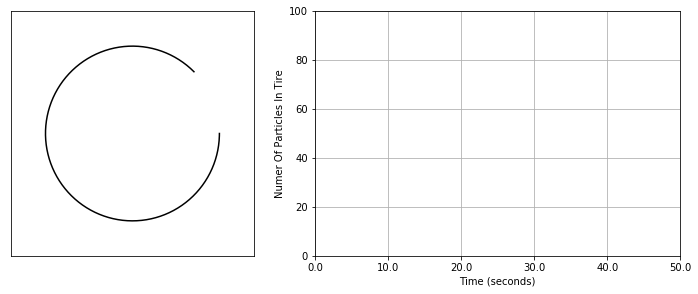

In [3]:
f = t*100

fig = plt.figure(figsize = (12, 4.5))
(tirePlot, numPartPlot) = fig.subplots(1, 2, gridspec_kw={'width_ratios': [2, 3]})
tirePlot.set_xlim([-7, 7])
tirePlot.set_ylim([-7, 7])
numPartPlot.set_xlim([0, f])
numPartPlot.set_ylim([0, 100])
numPartPlot.grid()

numPartPlot.set_xticks(np.linspace(0, f, 6))
numPartPlot.set_yticks([0, 20, 40, 60, 80, 100])
numPartPlot.set_xticklabels(np.linspace(0, t, 6))
numPartPlot.set_xlabel('Time (seconds)')
numPartPlot.set_ylabel('Numer Of Particles In Tire')
tirePlot.set_xticks([])
tirePlot.set_yticks([])

lengthOfHole = 3.927

thetaHole = lengthOfHole/5
thetaTire = np.linspace(thetaHole, 2*np.pi, 200)
tire = tirePlot.plot(5*np.cos(thetaTire), 5*np.sin(thetaTire), color = 'black')


In [4]:
growingPlot, = numPartPlot.plot([], [], color = 'blue')

xPlotData = []
yPlotData = []

In [5]:
def createParticles(numberOfParticles):
    global numParticles, particles, leakedParticles, totalParticles, leakedParticlePosition, leakedParticleDirection, particlePosition, particleDirection

    numParticles = numberOfParticles
    
    particlePosition = []
    particleDirection = []
    i = 0
    while i in range(numParticles):
        xP = round(random.uniform(-4, 4), 2)
        yP = round(random.uniform(-4, 4), 2)
        while xP**2 + yP**2 >= 25:
            yP = round(random.uniform(-4, 4), 2)
        particlePosition.append([xP, yP])
        
        thetaD = round(random.uniform(0, 2*np.pi), 2)
        xD = np.cos(thetaD)
        yD = np.sin(thetaD)
        particleDirection.append([xD, yD])
        
        i = i + 1

    particleXPosition = []
    particleYPosition = []
    for particle in particlePosition:
        particleXPosition.append(particle[0])
        particleYPosition.append(particle[1])
        
    leakedParticlePosition = []
    leakedParticleDirection = []

    particles, = tirePlot.plot(particleXPosition, particleYPosition, 'bo', markersize = 3)

    leakedParticles, = tirePlot.plot([], [], 'bo', markersize = 3)

    totalParticles = tirePlot.text(2.5, 4.5, str(numParticles), size = 40)
    
    

createParticles(100)


In [6]:
def angle(position):
    
    if position[0] == 0:
        theta = np.pi/2
    else:
        theta = np.arctan(position[1]/position[0])
        
    if position[0] > 0:
        if position[1] >= 0:
            particleTheta = theta
        else:
            particleTheta = 2*np.pi + theta
    else:
        particleTheta = np.pi + theta

    return particleTheta

In [7]:
def forward(position, direction):
    position = [position[0] + direction[0]/25, position[1] + direction[1]/25]
    return position

In [8]:
def setData(particles, newPositions):
    particleXPosition = []
    particleYPosition = []
    for particle in newPositions:
        particleXPosition.append(particle[0])
        particleYPosition.append(particle[1])
    particles.set_data(particleXPosition, particleYPosition)

In [9]:
def reflection(position, direction):
    n = [position[0]/np.sqrt(position[0]**2 + position[1]**2), \
    position[1]/np.sqrt(position[0]**2 + position[1]**2)]
    v = direction
    reflection = np.add(v, np.multiply((-2)*(np.dot(n, v)), n))
    d = reflection.tolist()
    
    newDirection = [d[0]/np.sqrt(d[0]**2 + d[1]**2), d[1]/np.sqrt(d[0]**2 + d[1]**2)]
    return newDirection

In [10]:
def init():
    
    particles.set_data([], [])
    leakedParticles.set_data([], [])
    totalParticles.set_text(str(numParticles))
    return particles, leakedParticles, totalParticles

In [11]:
count = numParticles

# Data
time = []
dataNum = []

def particleMovement(i):
    
    global particlePosition, particleDirection, thetaHole, \
           leakedParticlePosition, leakedParticleDirection, thetaHole, totalParticles, numParticles, count

    m = 0
    j = 0
    k = 0
    while m in range(numParticles):

        # If there are particles inside the circle
        if len(particlePosition) > j:

            particlePosition[j] = forward(particlePosition[j], particleDirection[j])
                        
            # Checking if the particle is outside of circle boundary      
            if particlePosition[j][0]**2 + particlePosition[j][1]**2 >= 25:

                # If particle is outside of circle boundary through the hole, remove from particle lists and add to leaked particle list
                if 0 < angle(particlePosition[j]) < thetaHole:
                    
                    leakedParticlePosition.append(particlePosition.pop(j))
                    leakedParticleDirection.append(particleDirection.pop(j))
                    
                    count = count - 1
                    totalParticles.set_text(str(count))
    
                    j = j 
                    
                # If particle is outside circle boundary at wall, reflect back in
                else:
                
                    particleDirection[j] = reflection(particlePosition[j], particleDirection[j])
                    setData(particles, particlePosition)

                    j = j + 1

            # If particle is inside boundary, update position
            else:

                j = j + 1

            setData(particles, particlePosition)
                                                   
        # If there are leaked particles
        if len(leakedParticlePosition) > k:

            leakedParticlePosition[k] = forward(leakedParticlePosition[k], leakedParticleDirection[k])

            setData(leakedParticles, leakedParticlePosition)
            k = k + 1
            

        m = m + 1
        
    xPlotData.append(i)
    yPlotData.append(count)
    growingPlot.set_data(xPlotData, yPlotData)
    
    # Data 
    if i%100 == 0: # Create data point every second (100 frames)
        time.append(i/100)
        dataNum.append(count)
        
    
    return particles, leakedParticles, totalParticles, growingPlot

In [12]:
anim = animation.FuncAnimation(fig, particleMovement, init_func=init, frames=f, interval = 10, blit = True, repeat = False)
HTML(anim.to_html5_video())


#### Creating Data Table

In [13]:
datadict = {'time (s)': time, 'number of particles': dataNum}
df = pd.DataFrame(data = datadict)

print(df.to_string(index = False))


    time (s)  number of particles
0        0.0                  100
1        1.0                   91
2        2.0                   81
3        3.0                   76
4        4.0                   66
5        5.0                   62
6        6.0                   56
7        7.0                   50
8        8.0                   44
9        9.0                   42
10      10.0                   37
11      11.0                   34
12      12.0                   34
13      13.0                   34
14      14.0                   31
15      15.0                   28
16      16.0                   27
17      17.0                   24
18      18.0                   23
19      19.0                   23
20      20.0                   22
21      21.0                   20
22      22.0                   19
23      23.0                   19
24      24.0                   15
25      25.0                   12
26      26.0                   10
27      27.0                    9
28      28.0  

#### Plotting Data and Exponential Decay Curve

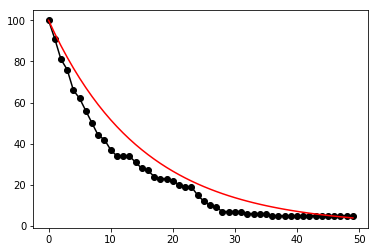

In [14]:
# Plotting Data
timeList = np.asarray(df['time (s)'])
particleCountList = np.asarray(df['number of particles'])
plt.plot(timeList, particleCountList, 'k-o')

# Plotting Exponential Decay Curve: y = 100(0.936)**x
exp = 100*(0.936**timeList)
plt.plot(timeList, exp, 'r-')

plt.show()